In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [2]:
crimes = pd.read_csv("CrimesChicago.csv")
crimes.head(5)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [3]:
crimes.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [4]:
crimes.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,7.079493e+06,7.079493e+06,7.079446e+06,6.464665e+06,6.465998e+06,7.011552e+06,7.011552e+06,7.079493e+06,7.011552e+06,7.011552e+06
mean,6.483016e+06,1.189420e+03,1.129628e+01,2.270960e+01,3.754691e+01,1.164542e+06,1.885741e+06,2.008818e+03,4.184207e+01,-8.767171e+01
std,3.188759e+06,7.031602e+02,6.946122e+00,1.383626e+01,2.153613e+01,1.713614e+04,3.266038e+04,5.382870e+00,8.987143e-02,6.202219e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.533523e+06,6.220000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152949e+06,1.859179e+06,2.004000e+03,4.176889e+01,-8.771379e+01
50%,6.472453e+06,1.111000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.166033e+06,1.890661e+06,2.008000e+03,4.185576e+01,-8.766605e+01
75%,9.242614e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176353e+06,1.909252e+06,2.013000e+03,4.190676e+01,-8.762833e+01
max,1.199607e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.020000e+03,4.202291e+01,-8.752453e+01


## Question 1
#### Preprocessing

In [5]:
# changing the date format to pandas format and adding date as index
crimes['Date'] = pd.to_datetime(crimes['Date'],format='%m/%d/%Y %I:%M:%S %p')
crimes.index = pd.DatetimeIndex(crimes.Date)
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 11:00:00,11034701,JA366925,2001-01-01 11:00:00,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
2017-10-08 03:00:00,11227287,JB147188,2017-10-08 03:00:00,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2017-03-28 14:00:00,11227583,JB147595,2017-03-28 14:00:00,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2017-09-09 20:17:00,11227293,JB147230,2017-09-09 20:17:00,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2017-08-26 10:00:00,11227634,JB147599,2017-08-26 10:00:00,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


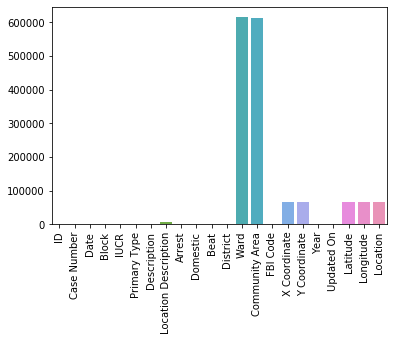

In [6]:
sns.barplot(x=crimes.columns, y=crimes.isna().sum())
plt.xticks(rotation=90)
plt.show()

### Dropping columns with many missing values and those which aren't useful

In [7]:
crimes.drop(labels=['Case Number', 'Block', 'IUCR', 'Beat', 'Ward', 'Community Area', 'FBI Code', 'Updated On',
                 'Latitude','Longitude', 'Location'], inplace=True, axis=1)
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year
Date,,,,,,,,,,,
2001-01-01 11:00:00,11034701,2001-01-01 11:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,4.0,NaN,NaN,2001
2017-10-08 03:00:00,11227287,2017-10-08 03:00:00,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,22.0,NaN,NaN,2017
2017-03-28 14:00:00,11227583,2017-03-28 14:00:00,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,8.0,NaN,NaN,2017
2017-09-09 20:17:00,11227293,2017-09-09 20:17:00,THEFT,OVER $500,RESIDENCE,False,False,3.0,NaN,NaN,2017
2017-08-26 10:00:00,11227634,2017-08-26 10:00:00,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,1.0,NaN,NaN,2017


## Adding new columns like month, weekday and hour

In [8]:
crimes['Month'] = (crimes['Date'].dt.month).apply(lambda x: calendar.month_abbr[x])
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year,Month
Date,,,,,,,,,,,,
2001-01-01 11:00:00,11034701,2001-01-01 11:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,4.0,NaN,NaN,2001,Jan
2017-10-08 03:00:00,11227287,2017-10-08 03:00:00,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,22.0,NaN,NaN,2017,Oct
2017-03-28 14:00:00,11227583,2017-03-28 14:00:00,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,8.0,NaN,NaN,2017,Mar
2017-09-09 20:17:00,11227293,2017-09-09 20:17:00,THEFT,OVER $500,RESIDENCE,False,False,3.0,NaN,NaN,2017,Sep
2017-08-26 10:00:00,11227634,2017-08-26 10:00:00,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,1.0,NaN,NaN,2017,Aug


In [9]:
crimes["Weekday"] = crimes['Date'].dt.weekday_name
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year,Month,Weekday
Date,,,,,,,,,,,,,
2001-01-01 11:00:00,11034701,2001-01-01 11:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,4.0,NaN,NaN,2001,Jan,Monday
2017-10-08 03:00:00,11227287,2017-10-08 03:00:00,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,22.0,NaN,NaN,2017,Oct,Sunday
2017-03-28 14:00:00,11227583,2017-03-28 14:00:00,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,8.0,NaN,NaN,2017,Mar,Tuesday
2017-09-09 20:17:00,11227293,2017-09-09 20:17:00,THEFT,OVER $500,RESIDENCE,False,False,3.0,NaN,NaN,2017,Sep,Saturday
2017-08-26 10:00:00,11227634,2017-08-26 10:00:00,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,1.0,NaN,NaN,2017,Aug,Saturday


In [10]:
crimes["Hour"] = crimes['Date'].dt.hour
crimes.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year,Month,Weekday,Hour
Date,,,,,,,,,,,,,,
2001-01-01 11:00:00,11034701,2001-01-01 11:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,4.0,NaN,NaN,2001,Jan,Monday,11
2017-10-08 03:00:00,11227287,2017-10-08 03:00:00,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,22.0,NaN,NaN,2017,Oct,Sunday,3
2017-03-28 14:00:00,11227583,2017-03-28 14:00:00,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,8.0,NaN,NaN,2017,Mar,Tuesday,14
2017-09-09 20:17:00,11227293,2017-09-09 20:17:00,THEFT,OVER $500,RESIDENCE,False,False,3.0,NaN,NaN,2017,Sep,Saturday,20
2017-08-26 10:00:00,11227634,2017-08-26 10:00:00,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,1.0,NaN,NaN,2017,Aug,Saturday,10


## Question 2
### Insights on crimes and date/time

### Crimes over days in a week

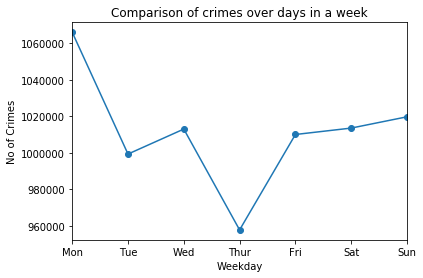

In [11]:
days = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
crimes.groupby('Weekday')['ID'].count().plot(marker='o',label='Crimes')
plt.xticks(np.arange(7),days)
plt.ylabel('No of Crimes')
plt.title("Comparison of crimes over days in a week")
plt.show()

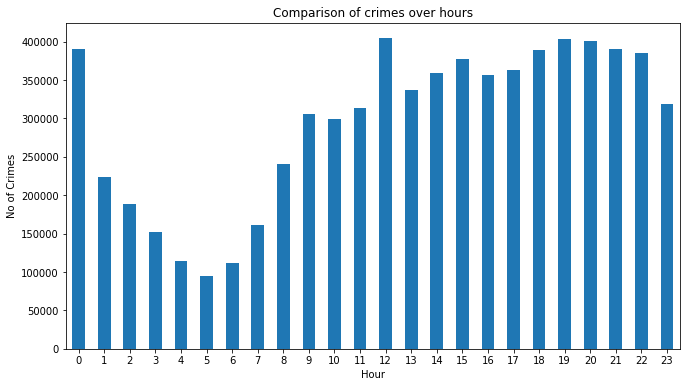

In [12]:
plt.figure(figsize=(11,6))
crimes.groupby('Hour')['ID'].count().plot(kind='bar')
plt.xticks(np.arange(24))
plt.xticks(rotation=0)
plt.ylabel('No of Crimes')
plt.title("Comparison of crimes over hours")
plt.show()

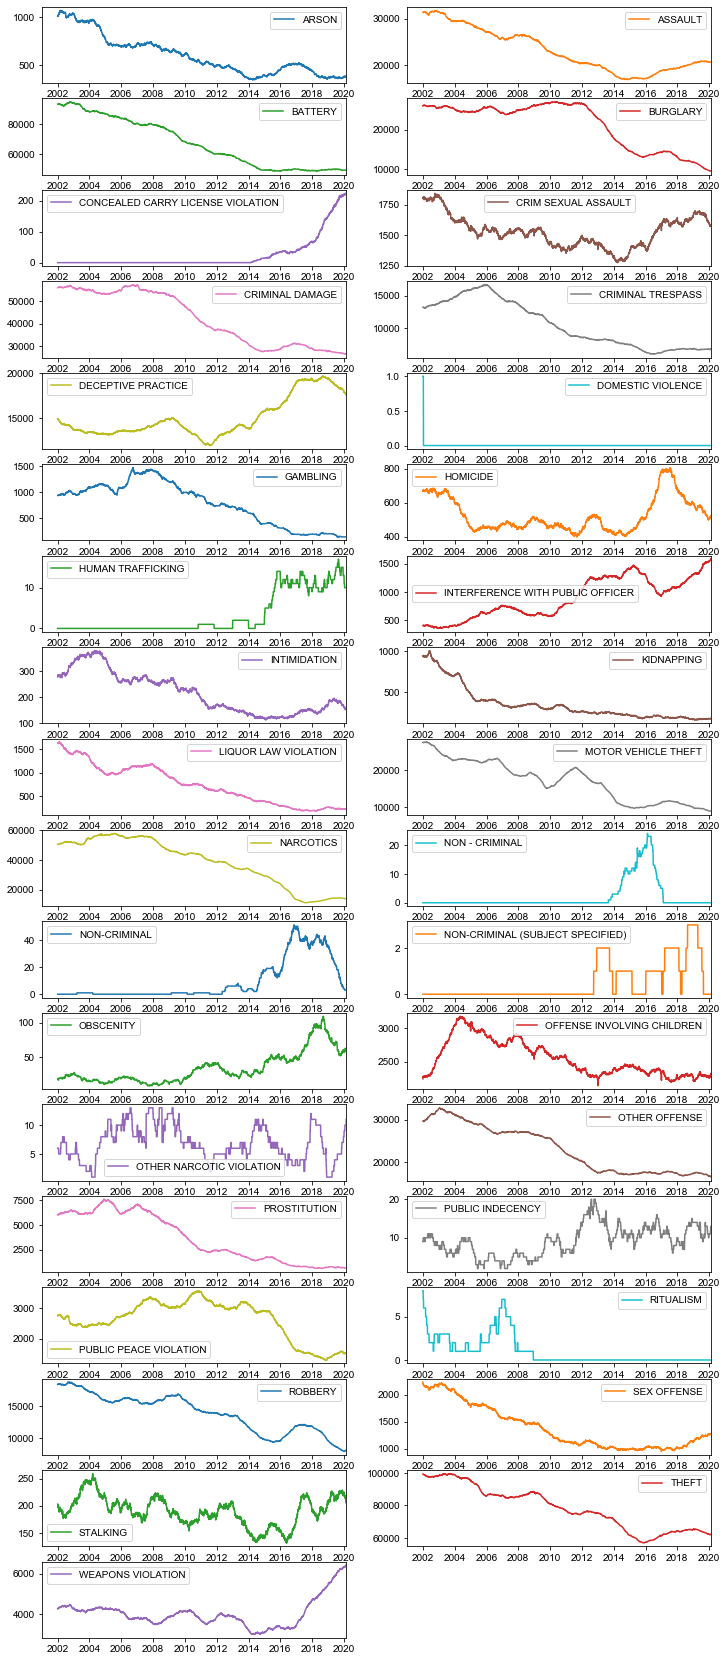

In [13]:
crimes_per_year = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
crimes_per_year.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 2), sharex=False, sharey=False)
plt.style.use(['seaborn-darkgrid'])

## Question 3
## Crimes over years

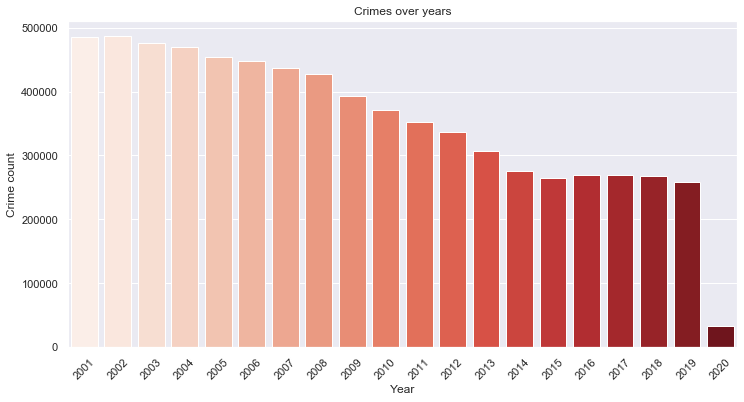

In [14]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Year', data=crimes, palette='Reds')
plt.ylabel('Crime count')
plt.title('Crimes over years')
plt.xticks(rotation=45)
plt.show()

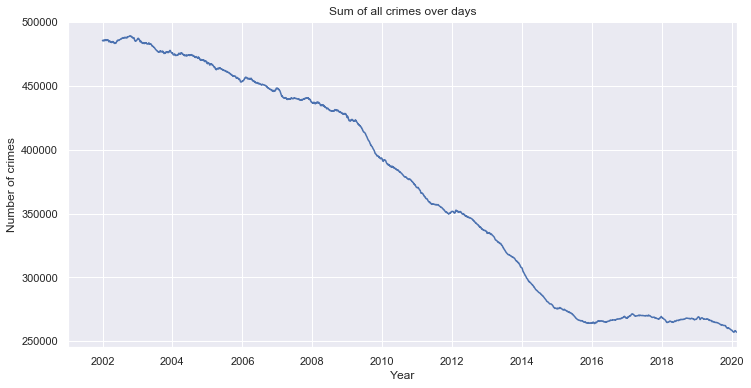

In [15]:
# plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Sum of all crimes over days')
plt.ylabel('Number of crimes')
plt.xlabel('Year')
plt.show()

#### From the above visualizations, we see that there has been a decline in the number of crimes from 2001 to 2016 after which it almost remained same with slightest differences.

## Question 4
### Relation between crimes and arrests

Arrests based on Primary Type of crime

In [16]:
primary_arrests = crimes.groupby(['Primary Type','Arrest'])['ID'].count()

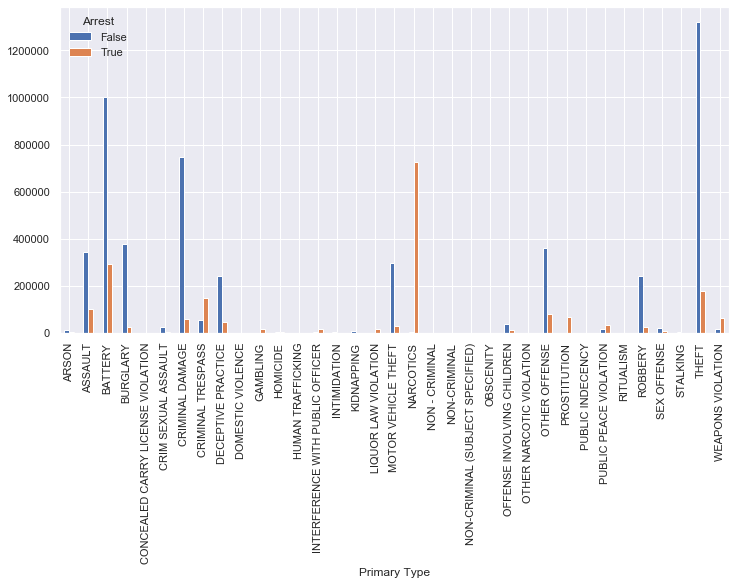

In [17]:
primary_arrests.unstack().plot(kind='bar')
plt.show()

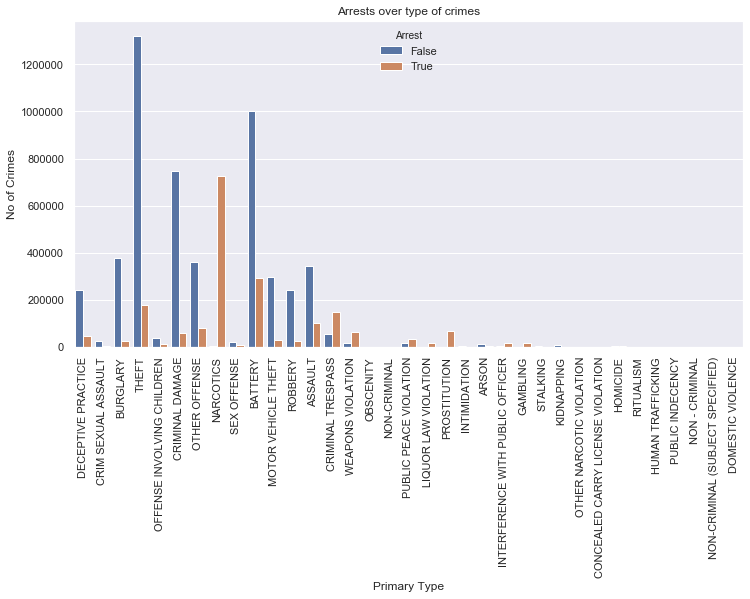

In [18]:
## using seaborn
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Primary Type',hue='Arrest',data=crimes)
plt.xticks(rotation='vertical')
plt.ylabel('No of Crimes')
plt.title("Arrests over type of crimes")
# plt.legend()
plt.show()

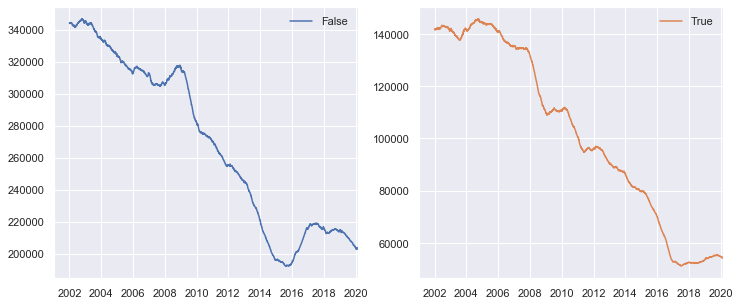

In [19]:
crimes_arrests = crimes.pivot_table('ID', aggfunc=np.size, columns='Arrest', index=crimes.index.date, fill_value=0)
crimes_arrests.rolling(365).sum().plot(figsize=(12, 5), subplots=True, layout=(-1, 2), sharex=False, sharey=False)
plt.show()

#### Based on all the visualizations and analysis above, we can conclude that the number of crimes are much greater than number of arrests.
#### We can also say that persons involved in crimes like narcotics, prostitution, liquor law violation have been arrested for sure.

## Question 5
### Locations with high crime-rate

### Top 5 locations of crime over years

In [20]:
crimes_2015 = crimes.loc['2015']
crimes_2016 = crimes.loc['2016']
crimes_2017 = crimes.loc['2017']
crimes_2018 = crimes.loc['2018']
crimes_2019 = crimes.loc['2019']

In [21]:
top_2015 = crimes_2015.groupby('Location Description')['ID'].count().sort_values(ascending=False)
top_2015[:5]

Location Description
STREET       60754
RESIDENCE    41670
APARTMENT    34948
SIDEWALK     27879
OTHER        10610
Name: ID, dtype: int64

In [22]:
top_2016 = crimes_2016.groupby('Location Description')['ID'].count().sort_values(ascending=False)
top_2016[:5]

Location Description
STREET       60947
RESIDENCE    46080
APARTMENT    34380
SIDEWALK     23492
OTHER        11365
Name: ID, dtype: int64

In [23]:
top_2017 = crimes_2017.groupby('Location Description')['ID'].count().sort_values(ascending=False)
top_2017[:5]

Location Description
STREET       59974
RESIDENCE    45956
APARTMENT    33490
SIDEWALK     21009
OTHER        11345
Name: ID, dtype: int64

In [24]:
top_2018 = crimes_2018.groupby('Location Description')['ID'].count().sort_values(ascending=False)
top_2018[:5]

Location Description
STREET       59051
RESIDENCE    44956
APARTMENT    34667
SIDEWALK     21143
OTHER        10929
Name: ID, dtype: int64

In [25]:
top_2019 = crimes_2019.groupby('Location Description')['ID'].count().sort_values(ascending=False)
top_2019[:5]

Location Description
STREET       56438
RESIDENCE    42705
APARTMENT    34521
SIDEWALK     20149
OTHER        10646
Name: ID, dtype: int64

### From the results above, there is no change in top 5 crime locations from 2015-2019

## Top 15 crime locations

In [26]:
top_15 = crimes.groupby('Location Description')['ID'].count().sort_values(ascending=False)
top_15 = top_15[:15]
top_15

Location Description
STREET                            1842000
RESIDENCE                         1198748
APARTMENT                          742527
SIDEWALK                           690319
OTHER                              270335
PARKING LOT/GARAGE(NON.RESID.)     203131
ALLEY                              157153
SCHOOL, PUBLIC, BUILDING           146406
RESIDENCE-GARAGE                   135657
SMALL RETAIL STORE                 128180
RESIDENCE PORCH/HALLWAY            124277
RESTAURANT                         114515
VEHICLE NON-COMMERCIAL             114254
GROCERY FOOD STORE                  91663
DEPARTMENT STORE                    89912
Name: ID, dtype: int64

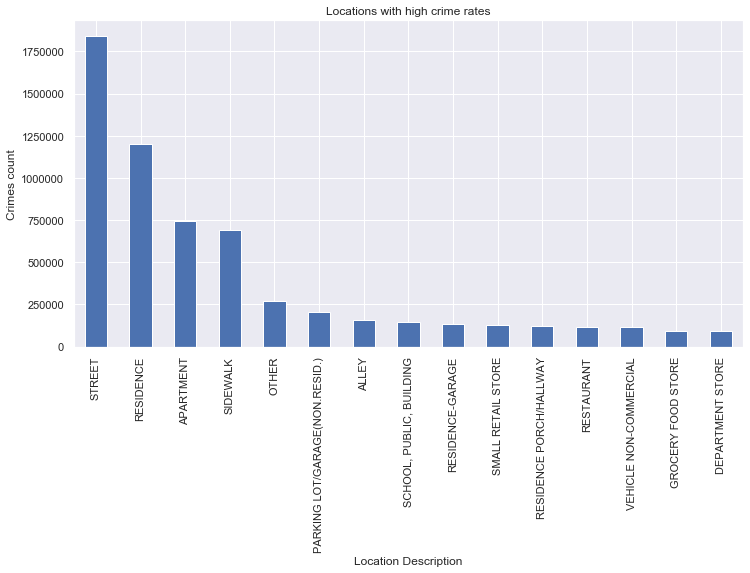

In [27]:
top_15.plot(kind='bar')
plt.ylabel('Crimes count')
plt.title("Locations with high crime rates")
plt.show()

In [28]:
district_count = crimes['District'].value_counts().to_frame()
district_count.reset_index(inplace = True)
district_count.rename(columns = {'index':'District','District':'Crimes'}, inplace = True)
district_count.head()

,District,Crimes
0,8.0,479245
1,11.0,454989
2,7.0,416001
3,6.0,410064
4,25.0,406186


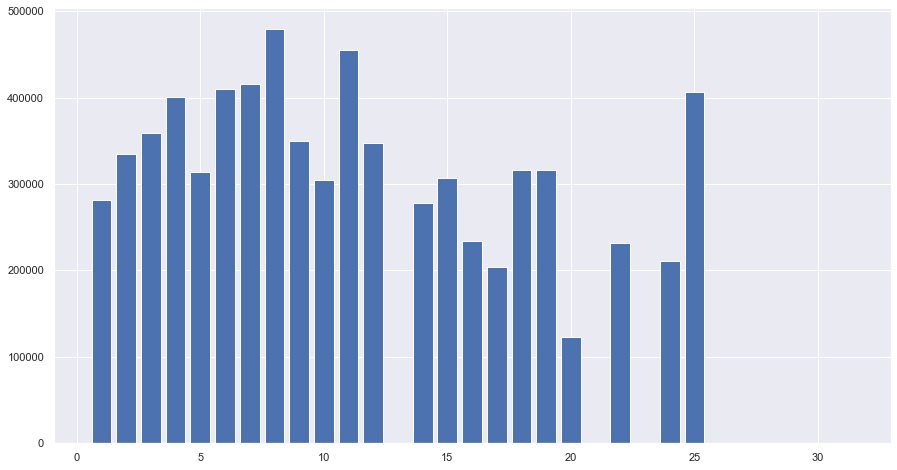

In [29]:
plt.figure(figsize=(15,8))
plt.bar(district_count['District'], district_count['Crimes'], label = 'Crimes')
plt.show()

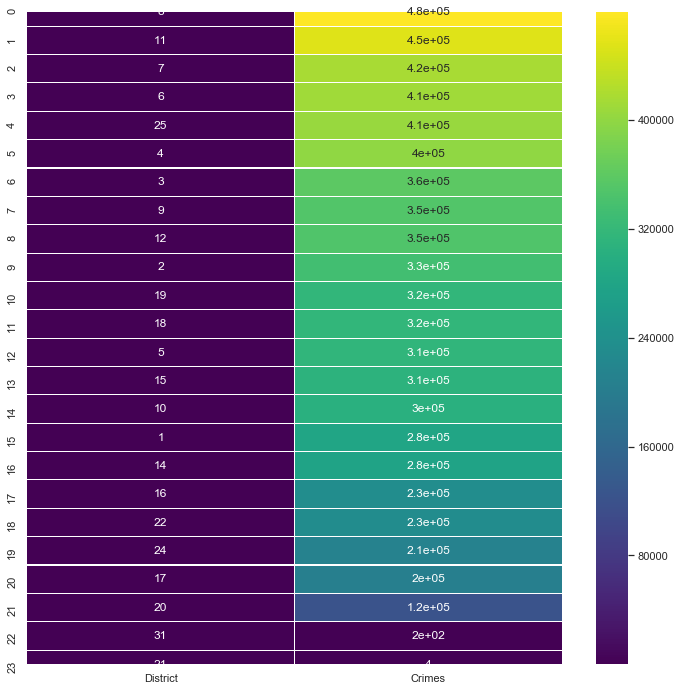

In [30]:
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(district_count, cmap='viridis', linewidths=0.1, annot=True)

## Question 6
### Domestic crime vs Arrests

In [31]:
domestic = crimes.groupby('Domestic')['ID'].count()
domestic

Domestic
False    6139212
True      940281
Name: ID, dtype: int64

Percentage of domestic violence that lead to arrests:  48.39176350704559


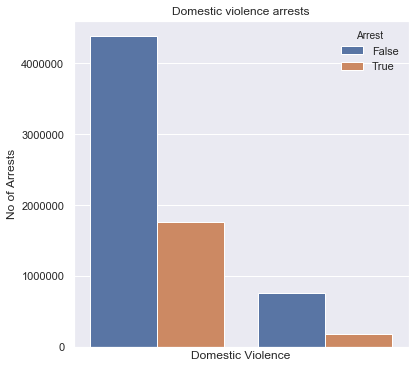

In [32]:
sns.set(rc={'figure.figsize':(6,6)})
# sns.countplot(x='Domestic', hue='Arrest',data=crimes,order=crimes['Domestic'].value_counts().index)
sns.countplot(x='Domestic', hue='Arrest', data=crimes)

arrests_sum = crimes[crimes['Arrest'] == True]['Arrest'].sum()
# print(arrests_sum)
domestic_sum = crimes[crimes['Domestic'] == True]['Domestic'].sum()
# print(domestic_sum)
print("Percentage of domestic violence that lead to arrests: ", domestic_sum*100/arrests_sum)
plt.tick_params(axis='x', labelbottom=False)
plt.xlabel('Domestic Violence')    
plt.ylabel('No of Arrests')
plt.title('Domestic violence arrests')
plt.show()

### Year wise arrests of Domestic Violence

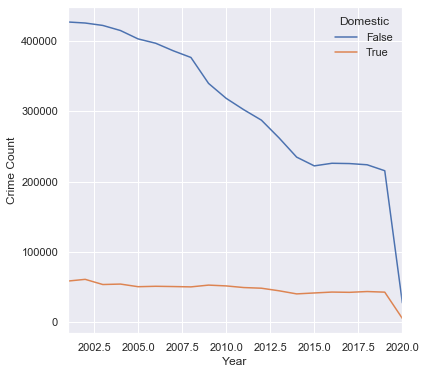

In [33]:
crimes.groupby('Year')['Domestic'].value_counts().unstack().plot(kind='line')
plt.ylabel('Crime Count')
plt.show()

## Question 7
### Interesting insights

### (i) Categories of thefts VS frequency of each category

In [34]:
thefts = crimes[crimes["Primary Type"] == 'THEFT']
thefts.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,X Coordinate,Y Coordinate,Year,Month,Weekday,Hour
Date,,,,,,,,,,,,,,
2017-09-09 20:17:00,11227293,2017-09-09 20:17:00,THEFT,OVER $500,RESIDENCE,False,False,3.0,NaN,NaN,2017,Sep,Saturday,20
2017-07-17 10:10:00,11022695,2017-07-17 10:10:00,THEFT,OVER $500,RESIDENCE,False,False,14.0,NaN,NaN,2017,Jul,Monday,10
2017-07-29 15:40:00,11036284,2017-07-29 15:40:00,THEFT,$500 AND UNDER,SIDEWALK,False,False,24.0,NaN,NaN,2017,Jul,Saturday,15
2017-07-29 10:00:00,11041422,2017-07-29 10:00:00,THEFT,OVER $500,RESIDENCE-GARAGE,False,False,20.0,NaN,NaN,2017,Jul,Saturday,10
2017-07-27 01:00:00,11042763,2017-07-27 01:00:00,THEFT,FROM BUILDING,APARTMENT,False,False,20.0,NaN,NaN,2017,Jul,Thursday,1


In [35]:
thefts.groupby([thefts['Description']]).size().sort_values(ascending=False)

Description
$500 AND UNDER                      576402
OVER $500                           366938
FROM BUILDING                       240304
RETAIL THEFT                        181078
FINANCIAL ID THEFT: OVER $300        44531
POCKET-PICKING                       36123
PURSE-SNATCHING                      17293
FINANCIAL ID THEFT:$300 &UNDER       15206
ATTEMPT THEFT                        11705
ATTEMPT FINANCIAL IDENTITY THEFT      2955
AGG: FINANCIAL ID THEFT               2901
FROM COIN-OP MACHINE/DEVICE           1118
DELIVERY CONTAINER THEFT               941
$300 AND UNDER                          15
OVER $300                               13
THEFT RETAIL                             1
dtype: int64

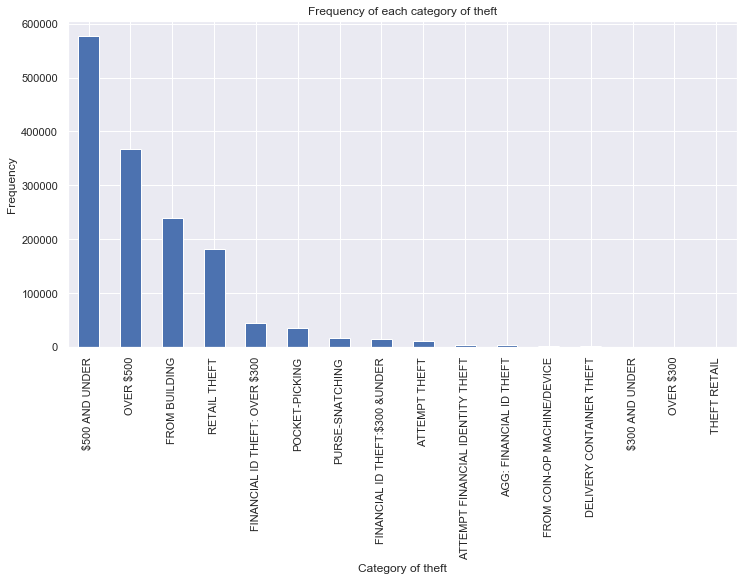

In [36]:
plt.figure(figsize=(12,6))
thefts.groupby([thefts['Description']]).size().sort_values(ascending=False).plot(kind='bar')
plt.title('Frequency of each category of theft')
plt.xlabel('Category of theft')
plt.ylabel('Frequency')
plt.show()

### (ii) Analysis on top crimes

In [37]:
types = crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=False)
types[:5]

Primary Type
THEFT              1497524
BATTERY            1294187
CRIMINAL DAMAGE     804821
NARCOTICS           729499
ASSAULT             444272
dtype: int64

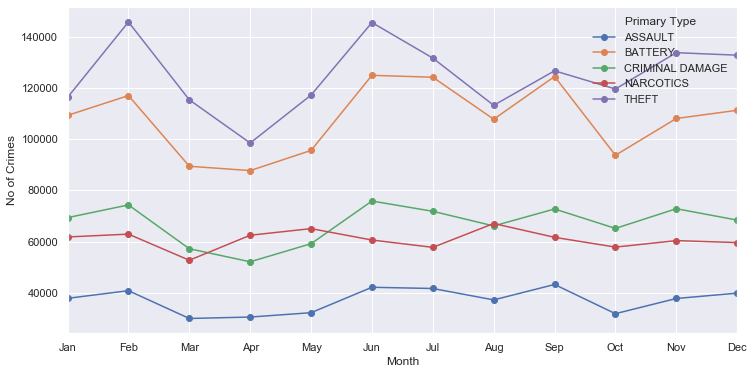

In [38]:
top_crime = crimes[(crimes['Primary Type']=='THEFT')|(crimes['Primary Type']=='BATTERY')|(crimes['Primary Type']=='CRIMINAL DAMAGE')|(crimes['Primary Type']=='NARCOTICS')|(crimes['Primary Type']=='ASSAULT')]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
top_crime.groupby(['Month','Primary Type',])['ID'].count().unstack().plot(figsize=(12,6), marker='o')
plt.xticks(np.arange(12),months)
plt.ylabel('No of Crimes')
plt.show()

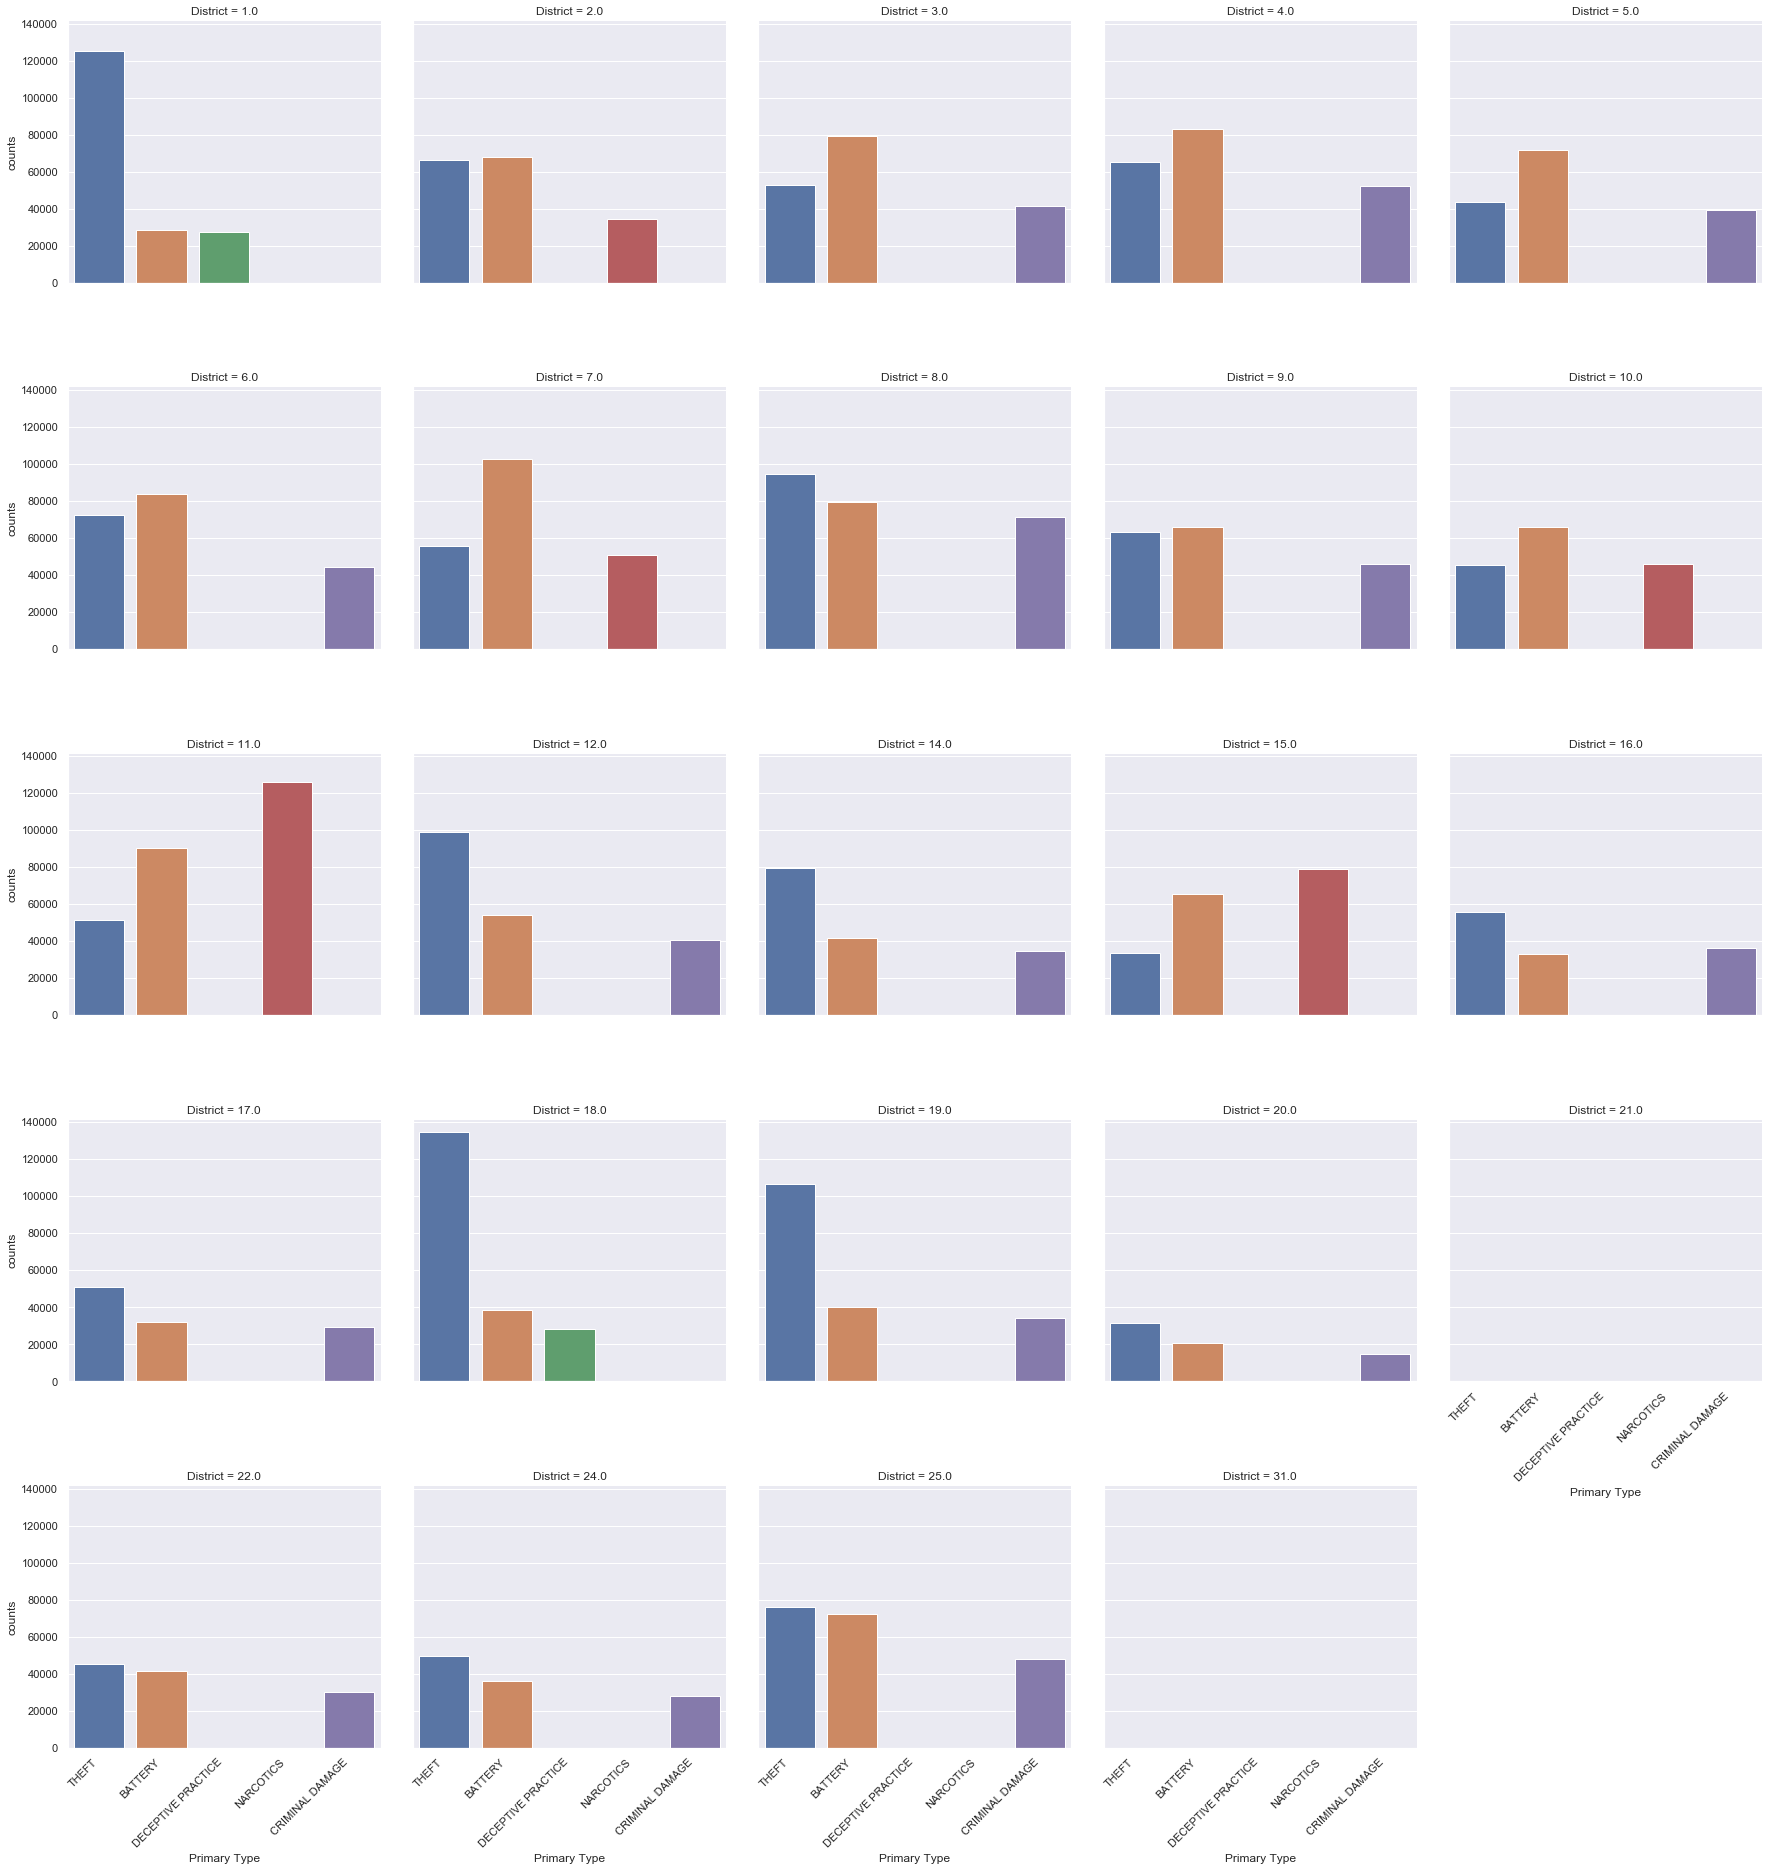

In [39]:
tops = crimes.groupby(['District', 'Primary Type']).size().reset_index(name='counts').groupby('District').apply(lambda x: x.sort_values('counts',ascending=False).head(3))

g =sns.catplot("Primary Type", y='counts', col="District", col_wrap=5,
                   data=tops, kind='bar')
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=45, ha='right')

plt.subplots_adjust(hspace=0.4)